# Homework4: Instructions

Team Members:

* Deepan Chakravarthi Padmanabhan
* Jaswanth Bandlamudi
* Muhammad Umer Ahmed Khan

1) Write down 3 questions and their brief answers on the reading material. [2 Points]

Q: Give the risk functional and empirical risk functional equations.

A: Risk functional equation: The expected value of loss is defined by the risk functional.

$$R(w) = \int{L(d,f(x,w))dF_{x,D}(x,d)}$$

Empirical risk functional equation:

$$R_{emp}(w) = \frac{1}{N}\sum_{i=0}^{N}{L(d_i,F(x_i,w))}$$

where ${\{x_i,d_i\}}_{i=1}^N$ is the training sample given and $L(d_i,F(x_i,w))$ is the loss function.

N is the number of samples.

$F_{x,D}(x,d)$ is the joint cumulative distribution function.

The empirical risk function is useful in two desirable ways:

1. The empirical risk function is independent on the unknown distribution function $F_{x,D}(x,d)$ in an explicit way.
2. Theoretically $R_{emp}(w)$ can be minimized with the weight vector w.


Q: What is Shattering and dichotomy?

A: A learning machine f can shatter a set of points $x_1,x_2,x_3....x_r$, if and only if for every possible training set of the form $(x_1,y_1),....,(x_r,y_r)$, there exists a parameter $\alpha$  of the f, that gets zero training zero.

Shattering is a process of classifying/ separating two classes with the help of a model (e.g Line, Circle, Rectangle, Triangle, Neural network, Mixture of Gaussian, etc.,).

The maximum number of points that can be arranged so that f shatters the points is defined as the VC dimension of the learning machine f.

Dichotomy refers to binary classification function or decision rule.

Q: What is the abbreviation of PAC learning? What are the two control parameters of PAC learning?

PAC = Probably approximately correct learning.

The two control parameters are error parameter $\epsilon$ and confidence parameter, $\delta$.

Error parameter $\epsilon$ $\in$ (0,1]: This parameter specifies the error allowed in a good approximation of the target concept c(x) by the hypothesis g(x).

Confidence parameter $\delta$ $\in$ (0,1]: This parameter controls the likelihood of constructing a good approximation.

Q: Complexity bounds for certain classes of ANNS:

A: i. Network (N) with a single linear neuron : VCdim(N) = m + 1  ( m = no. of dimension)

   ii. N as an arbitrary feedforward with McCulloch Pitts neurons: VCdim(N) = O(Wlog2W) (W = free params)
   
   iii. N feedforward multilayer sigmoids: VCdim(N) = O(W*W) (W = free params)
   
   
Q: What is training error and generalization error?

A: The training error is the frequency of errors made by a learning machine of some weight vector w during the training session. The generalization error is defined by the frequency of errors made by the machine when it is tested with examples not seen before.The major underlying assumption is the test data is drawn from the same population as the training data. The generalization error for a target function f with hypothesis h in hypothesis space H and distribution D is:$$E_{out}(h) = P(h(x) != f(x))$$

   


2) Read the rest of chapter 2 from Haykin’s book (2nd edition). Summarize or sketch your insights in mind-map or an outline or a summary. [4 Points]

![mindmap](.\mindmap.png)


3) Definition: consistent learner

• A learner is consistent if it outputs hypotheses that perfectly fit the training data, whenever possible. It is quite reasonable to ask that a learning algorithm be consistent, given that we typically prefer a hypothesis that fits the training data over one that does not.

Task:

• Write a consistent learner for Hr from last Exercise (i.e. Hr = {((a < x < b)⋀(c < y < d)) | a, b,c, d ∈ IR } ). Generate a variety of target concept rectangles at random, corresponding to different rectangles in the plane. Generate random examples of each of these target concepts, based on a uniform distribution of instances within the rectangle from (0,0) to (100, 100).

Plot the generalization error as a function of the number of training examples, m. On the same graph, plot the theoretical relationship between e and m, for d = .95. Does theory fit experiment?

Note: the consistent learner is not NN.
[8 Points]

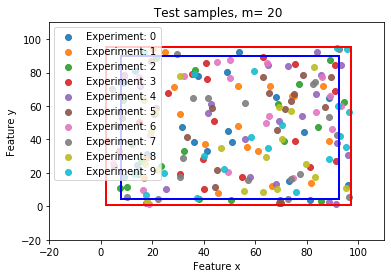

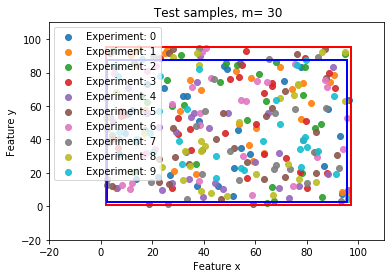

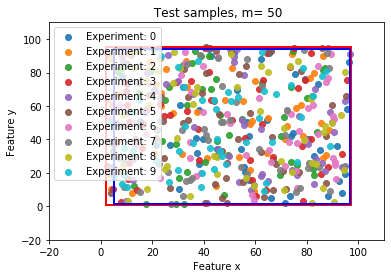

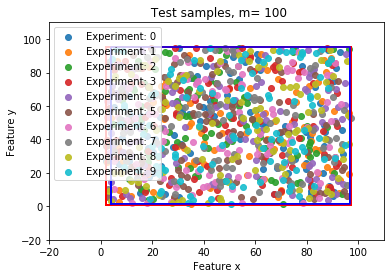

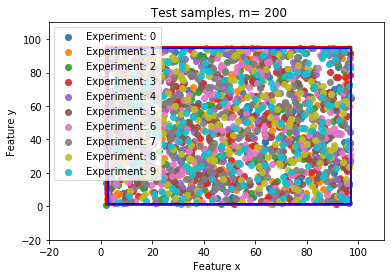

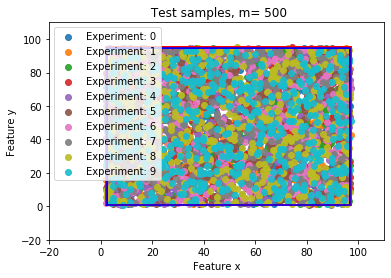

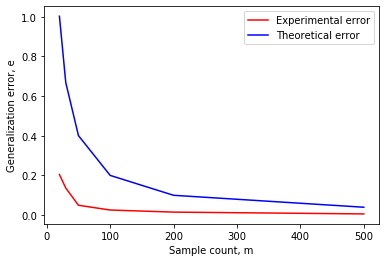

From the last graph, it is clear that the number of samples bound fomula
 for supervised learning tasks are a reflection of distribution-free, worst-case theoretical values.
 Therefore, on average from experimentation, we get error values lesser than the theoretical ones.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random

def target_rectangle(x_min,x_max,y_min,y_max):
    '''Create random rectangle in the defined interval.
    :parameters:
        x_min, y_max, y_min, y_max: limit bounds to create the rectangle
    :returns:
        output: vertices co-ordinates of a rectangle'''
    x_left = np.random.randint(0,x_min+5)
    y_left = np.random.randint(0,y_min+5)
    x_right = np.random.randint(x_max-5,100)
    y_right = np.random.randint(y_max-5,100)
    return x_left,y_left,x_right,y_right

def get_theoretical_value(samples):
    '''Calculates the theoretical value
    :parameter:
        samples: sample count
    :returns:
        output: theoretical value of error'''
    total_rectangles = (1/4)*(n*(n+1))**2 # n sum of left-right and up-down.
    confidence = 0.95
    delta = 1 - confidence
    # Formula to calculate error
    # Error = 1/samples *(ln|H| + ln(delta))
    error = (1/samples)*((np.log(total_rectangles))+np.log((1/delta)))
    return error

def plot_rectangle(rectangle,c):
    '''Plots the rectangle
    :parameter:
        rectangle: list containing rectangle vertices'''
    x_left, y_left, x_right, y_right = rectangle
    plt.plot([x_left,x_right,x_right,x_left,x_left],[y_left,y_left,y_right,y_right,y_left], c=c)
    
def plot_error(sample_count, generalization_error, theoretical_error):
    '''Plots the Generalization error Vs Theoretical error
    :parameter:
        sample_count: different sample value list
        generalization_error: generalization error
        theoretical_error: theoretical error values computed'''
    plt.plot(sample_count,generalization_error,label="Experimental error", c='r')
    plt.plot(sample_count,theoretical_error,label="Theoretical error", c='b')
    plt.xlabel("Sample count, m")  
    plt.ylabel("Generalization error, e")
    plt.legend(loc= 'upper right')
    plt.show()

def concept_samples(target_rectangle_list,sample_size):
    '''Generates random sample inside the target rectangle using uniform distribution
    :parameter:
        target_rectangle_list: vertices of target rectangle
        sample_size: number of samples to be generated
    :return:
        x_random, y_random: list of samples inside the target rectangle'''
    x_left = target_rectangle_list[0]
    y_left = target_rectangle_list[1]
    x_right = target_rectangle_list[2]
    y_right = target_rectangle_list[3]
    x_random = np.random.uniform(x_left,x_right,sample_size)
    y_random = np.random.uniform(y_left,y_right,sample_size)
    return x_random,y_random

def calc_generalization_error(x_random,y_random,hypothesis_rectangle):
    '''Calculates generalization error given hypothesis rectangle
    :parameter:
        hypothesis_rectangle: list containing hypothesis rectangle vertices
        x_random, y_random: random samples of x and y
    :return:
        error: generalization error/ experimental error'''
    x_ = [hypothesis_rectangle[0]<=point_x<=hypothesis_rectangle[2] for point_x in x_random]
    y_ = [hypothesis_rectangle[1]<=point_y<=hypothesis_rectangle[3] for point_y in y_random]
    mismatch_negatives = np.logical_and(x_,y_)
    wrong = len(x_random)-sum(mismatch_negatives)
    error = (wrong/len(x_random))
    return error

def generate_hypothesis_rectangle(feature_x, feature_y):
    '''Calculates tight bound hypothesis rectangle given random samples inside target rectangle
    :parameter:
        feature_x, feature_y: list of samples
    :return:
        hypothesis_rectangle_list: vertices of hypothesis rectangle'''
    hypothesis_x_left = np.min(feature_x)
    hypothesis_y_left = np.min(feature_y)
    hypothesis_x_right = np.max(feature_x)
    hypothesis_y_right = np.max(feature_y)
    hypothesis_rectangle_list = [hypothesis_x_left,hypothesis_y_left,hypothesis_x_right,hypothesis_y_right]
    return hypothesis_rectangle_list

# Declarations
x_left = 0
y_left = 0
x_right = 100
y_right = 100
sample_count = [20,30,50,100,200,500]
n = 100
experiments_per_hypothesis = 10

# Generate target rectangle between (0,0) and (100,100np.logical_and(x_,y_)np.logical_and(x_,y_)np.logical_and(x_,y_))
target_rectangle_list = list()
target_rectangle_list = target_rectangle(x_left,x_right,y_left,y_right)
generalization_error = list()
theoretical_error = list()

# For each of the sample counts
for samples in sample_count:
    error = []
    # Generate samples inside target rectangle
    feature_x,feature_y = concept_samples(target_rectangle_list,samples)
    # Generate hypothesis rectangle
    hypothesis_rectangle_list = generate_hypothesis_rectangle(feature_x, feature_y)
    theoretical_error.append(get_theoretical_value(samples))
    # For each sample count perform the task for a number of times.
    for experiment in range(experiments_per_hypothesis):
        # Generate samples again in the target to evaluate the error between target and hypothesis rectangle
        feature_x,feature_y = concept_samples(target_rectangle_list,samples)
        error.append(calc_generalization_error(feature_x,feature_y,hypothesis_rectangle_list))
        # Visualization plots
        plot_rectangle(target_rectangle_list,c = 'r')
        plot_rectangle(hypothesis_rectangle_list, c= 'b')
        plt.title(" Test samples, m= "+str(samples))
        plt.scatter(feature_x,feature_y,alpha=0.9,label="Experiment: "+str(experiment))
        plt.xlim((-20,110))
        plt.ylim((-20,110))
        plt.xlabel('Feature x')
        plt.ylabel('Feature y')
        plt.legend(loc='upper left')
    plt.show()
    generalization_error.append(np.mean(error))
plot_error(sample_count,generalization_error, theoretical_error)
print("From the last graph, it is clear that the number of samples bound fomula\n \
for supervised learning tasks are a reflection of distribution-free, worst-case theoretical values.\n \
Therefore, on average from experimentation, we get error values lesser than the theoretical ones.")


4) Consider training a two-input perceptron. Give an upper bound on the number of training examples sufficient to assure with 90%  confidence that the learned perceptron will have true error of at most 5%. Does this bound seem realistic? [8 Points]

In [26]:
import math
# Given
error_percentage_atmost = 5
perceptron_confidence_percentage = 90
perceptron_num_inputs = 2

# From Blumer et al., 1989. 
# bound,m >= 1/error(4*log2(2/error_prob)+8*vc_dimension_concept*log2(13/error))
# Variables in the formula.
confidence = perceptron_confidence_percentage/100
error_probability = 1- confidence
error_ = error_percentage_atmost/100
del_ = error_probability
'''The percepton has a linear decision surface and the hypothesis space is infinite.'''

'''The VC dimension of this perceptron is 3.'''
vc_dimension = perceptron_num_inputs + 1
bound_on_examples_m = (1/error_)*(4*math.log2(2/del_) + 8*vc_dimension*math.log2(13/error_))

print("Upper bound: {}\n".format(bound_on_examples_m))
print("The upper bound on the number of training examples sufficient to assure 90% \
confidence, ie with 10% probability error any target concept by a 2 input perceptron \
with error at most 5% is {}.\n".\
      format(math.ceil(bound_on_examples_m)))

print("THIS VALUE IS NOT REALISTIC as the perceptron has only two parameters ie. weights.\n\
Giving 4197 samples for learning 2 parameters seems unrealistic.")

Upper bound: 4196.490797844647

The upper bound on the number of training examples sufficient to assure 90% confidence, ie with 10% probability error any target concept by a 2 input perceptron with error at most 5% is 4197.

THIS VALUE IS NOT REALISTIC as the perceptron has only two parameters ie. weights.
Giving 4197 samples for learning 2 parameters seems unrealistic.


5)  Consider the class C  of concepts of the form (a <= x <= b) AND (c<=y <= d),    
   where a, b, c and d are integers in the interval (0,99). Note each concept in this class correspondsto a rectangle with integer-valued boundaries on a portion of the x, y  plane.   
   Hint: Given a region in the plane bounded by the points (0,0)  and (n -1 , n - I),  the number of distinct rectangles with integer-valued boundaries within this region is $1/4 *  n(n+1)^2$
- Give an upper bound on the number of randomly drawn training examples sufficient to assure that for any target concept c  in C,  any consistent learner using H = C  will, with probability 95%, output a hypothesis with error at most 0.15 !
- Now suppose the rectangle boundaries a, b, c,  and d  take on real values instead of integer values. Update your answer to the first part of this question.
[8 Points]

In [28]:
#a

'''a. Given the class C is of form (a <= x <= b) AND (c<= y <= d) and the a,b,c,d assumed are from the range (0,99).

Considering that the boundaries assume integer values the number of possibilities considering the x and Y limits is $\frac{n^{2}(n+1)^{2}}{4}$ where n = 100

Hence the total number of distinct rectangle formed are $\frac{100^{2}(101)^{2}}{4}$ = 25,502,500. 

Also given, $\delta = 1 - probability = 1-0.95 = 0.05$ and error $\epsilon = 0.15$

The upper limit for the hypothesis size is 

$$ N >= \frac{1}{\epsilon}[ln|H| + ln \frac{1}{\delta}] $$

$$ N >= \frac{1}{0.15}[ln|25,502,500| + ln \frac{1}{0.05}] $$'''

''' From ref, https://www.cs.cmu.edu/~mgormley/courses/10601-s17/slides/lecture28-pac.pdf
Slide no: 31, realizable finite number of hypothesis, the samples bound is given by,
N>=1/error (log|H|+log(1/delta))'''


import numpy as np
import math
confidence_percentage = 95
error = 0.15
confidence = confidence_percentage/100
delta = 1- confidence
n =100
total_rectangles = (1/4)*(n*(n+1))**2
upper_bound_num_samples = math.ceil((np.log(total_rectangles)+np.log(1/delta))/error)
print("Solution a:\n The upper bound on the number of randomly drawn training examples to achieve the given\
 error and confidence is:\n", upper_bound_num_samples)

#b

'''b. When the a,b,c,d values assume real values then the number of samples can be computed using

$$ N <= \frac{1}{\epsilon}[8*VCdim(H)log_{2}(\frac{13}{\epsilon}) + 4 log_{2} \frac{2}{\delta}] $$

As the x and y limits are forming a rectangle its VC Dimension is 4'''

''' From ref, https://www.cs.cmu.edu/~mgormley/courses/10601-s17/slides/lecture28-pac.pdf'''

VC_dimension = 4 # Rectangle VC dimension
upper_bound_num_samples_realvalues = math.ceil((8*VC_dimension*np.log2(13/error)+4*np.log2(2/delta))/error)
print("\nSolution b:\nThe upper bound in case a,b,c,d can take real values:\n", upper_bound_num_samples_realvalues)

Solution a:
 The upper bound on the number of randomly drawn training examples to achieve the given error and confidence is:
 134

Solution b:
The upper bound in case a,b,c,d can take real values:
 1516
